# Read the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error


import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
# read train data

df = pd.read_csv("/content/DailyClimateTrain.csv",
                 parse_dates=['date'],  # change to date time format
                 index_col="date")
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667
2013-01-04,8.667,71.333,1.233,1017.167
2013-01-05,6.000,86.833,3.700,1016.500
...,...,...,...,...
2016-12-28,17.217,68.043,3.548,1015.565
2016-12-29,15.238,87.857,6.000,1016.905
2016-12-30,14.095,89.667,6.267,1017.905


In [3]:
df.info()

# no null values
# all float

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.000,25.496,7.348,6.000,18.857,27.714,31.306,38.714
humidity,1462.000,60.772,16.770,13.429,50.375,62.625,72.219,100.000
wind_speed,1462.000,6.802,4.562,0.000,3.475,6.222,9.238,42.220
meanpressure,1462.000,1011.105,180.232,-3.042,1001.580,1008.563,1014.945,7679.333


# Exploratory Data Analysis

In [5]:
# creating new features for EDA

df["year"] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df["date"] = df.index.date

df.head()

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,date
date,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,2013-01-01
2013-01-02,7.400,92.000,2.980,1017.800,2013,1,2,2,2013-01-02
2013-01-03,7.167,87.000,4.633,1018.667,2013,1,3,3,2013-01-03
2013-01-04,8.667,71.333,1.233,1017.167,2013,1,4,4,2013-01-04
2013-01-05,6.000,86.833,3.700,1016.500,2013,1,5,5,2013-01-05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int32  
 5   month         1462 non-null   int32  
 6   day           1462 non-null   int32  
 7   dayofweek     1462 non-null   int32  
 8   date          1462 non-null   object 
dtypes: float64(4), int32(4), object(1)
memory usage: 91.4+ KB


In [7]:
# creating dark gray template(xgridoff_dark) from xgridoff template:

import plotly.io as pio

# Get the 'xgridoff' template
xgridoff_template = pio.templates['xgridoff']

# Customize the template for dark mode
xgridoff_template.layout.paper_bgcolor = 'rgb(25, 25, 25)'  # very dark gray background
xgridoff_template.layout.plot_bgcolor = 'rgb(35, 35, 35)'  # Dark gray plot background

xgridoff_template.layout.font.color = 'lightgray'  # Light gray font color

# Adjust gridline color and width
xgridoff_template.layout.xaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.yaxis.gridcolor = 'rgba(200, 200, 200, 0.3)'  # Light gray with transparency
xgridoff_template.layout.xaxis.gridwidth = 1  # Set gridline width
xgridoff_template.layout.yaxis.gridwidth = 1  # Set gridline width

# Update Plotly templates with the modified 'xgridoff' template
pio.templates['xgridoff_dark'] = xgridoff_template

In [8]:
fig_meantemp = px.line(df, x=df.index, y='meantemp', title='Mean Temperature Over Time')
fig_meantemp.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meantemp.show()

fig_humidity = px.line(df, x=df.index, y='humidity', title='Humidity Over Time')
fig_humidity.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_humidity.show()

fig_wind_speed = px.line(df, x=df.index, y='wind_speed', title='Wind Speed Over Time')
fig_wind_speed.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_wind_speed.show()

fig_meanpressure = px.line(df, x=df.index, y='meanpressure', title='Mean Pressure Over Time')
fig_meanpressure.update_layout(template='xgridoff_dark', title_x=0.5, xaxis_title="Date")
fig_meanpressure.show()


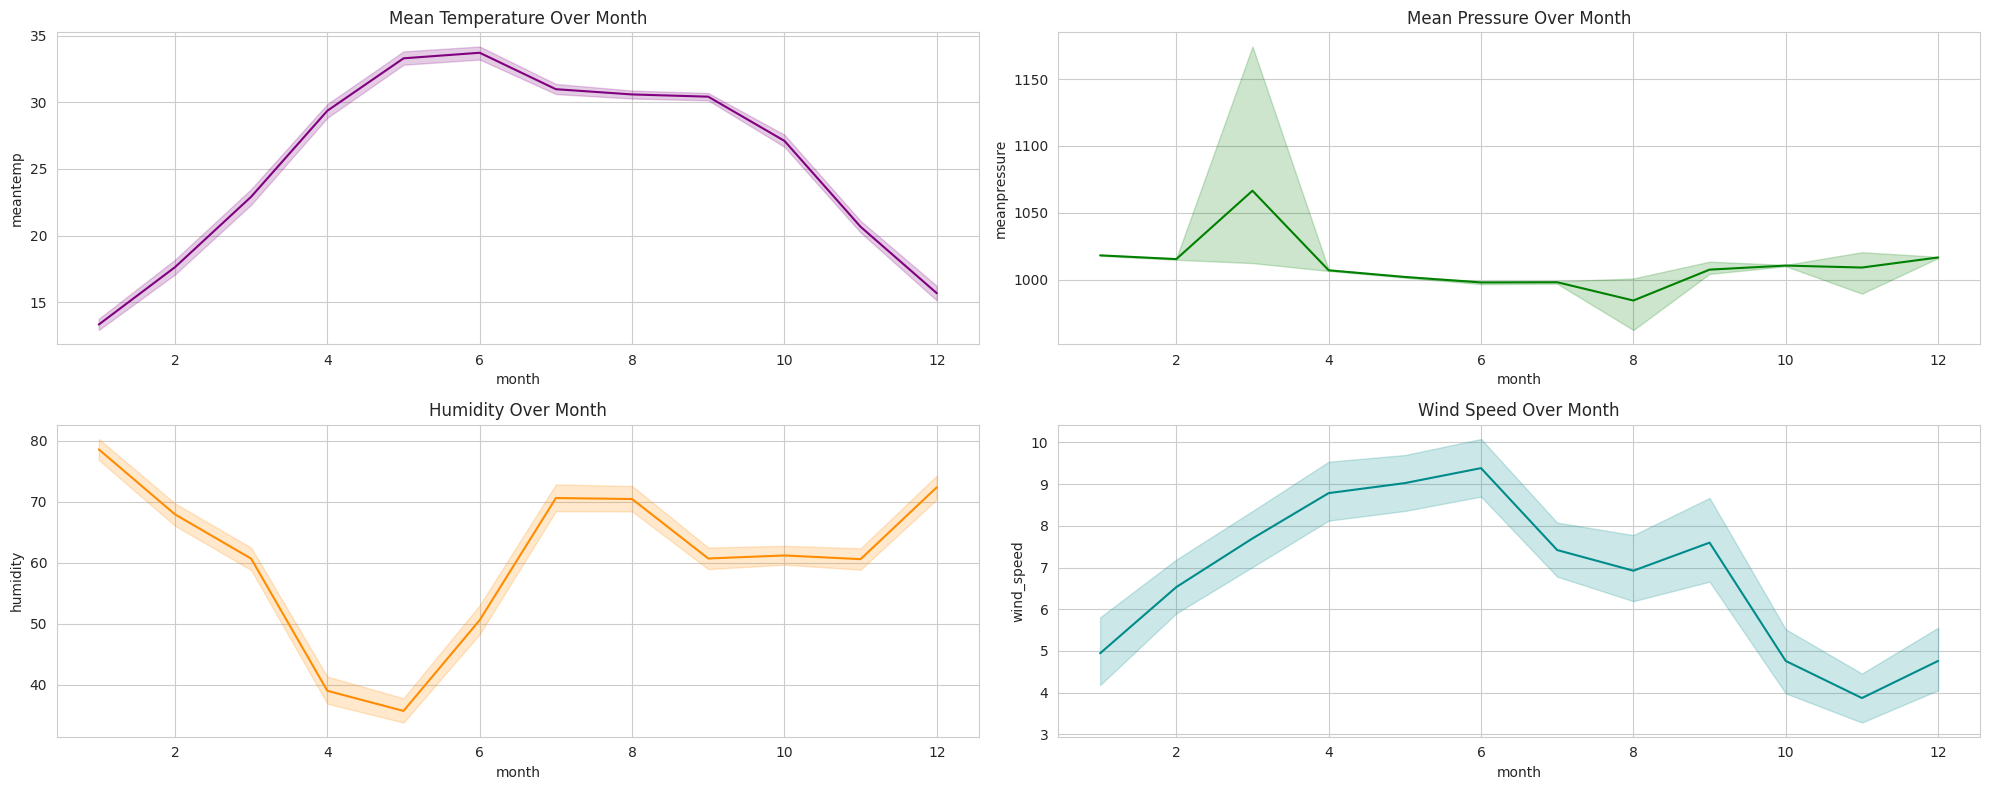

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.set_style('darkgrid')

# Plot each parameter against the 'month'
sns.lineplot(x='month', y='meantemp', data=df, color='purple', ax=axes[0][0])
axes[0][0].set_title('Mean Temperature Over Month')

sns.lineplot(x='month', y='humidity', data=df, color='darkorange', ax=axes[1][0])
axes[1][0].set_title('Humidity Over Month')

sns.lineplot(x='month', y='meanpressure', data=df, color='green', ax=axes[0][1])
axes[0][1].set_title('Mean Pressure Over Month')

sns.lineplot(x='month', y='wind_speed', data=df, color='darkcyan', ax=axes[1][1])
axes[1][1].set_title('Wind Speed Over Month')

plt.tight_layout()
plt.show()


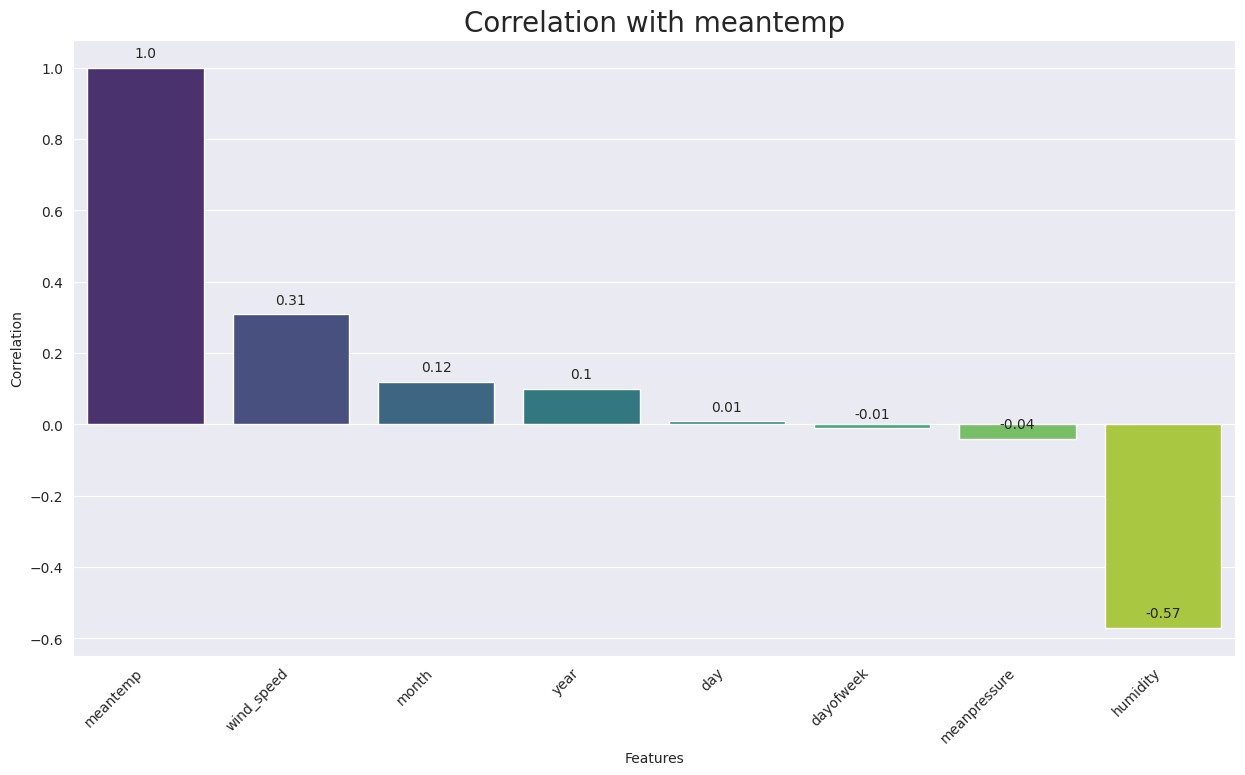

In [10]:
plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')

correlation_matrix = round(df.select_dtypes('number').corr(), 2)

correlation_with_trgt = correlation_matrix['meantemp'].sort_values(ascending=False)

ax = sns.barplot(x=correlation_with_trgt.index, y=correlation_with_trgt, palette='viridis')

plt.title('Correlation with meantemp', size= 20)
plt.xlabel('Features')
plt.ylabel('Correlation')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
df = df[['meantemp', 'humidity', 'wind_speed']]
df.head()

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000,84.500,0.000
2013-01-02,7.400,92.000,2.980
2013-01-03,7.167,87.000,4.633
2013-01-04,8.667,71.333,1.233
2013-01-05,6.000,86.833,3.700


# Preparing Data for Modeling

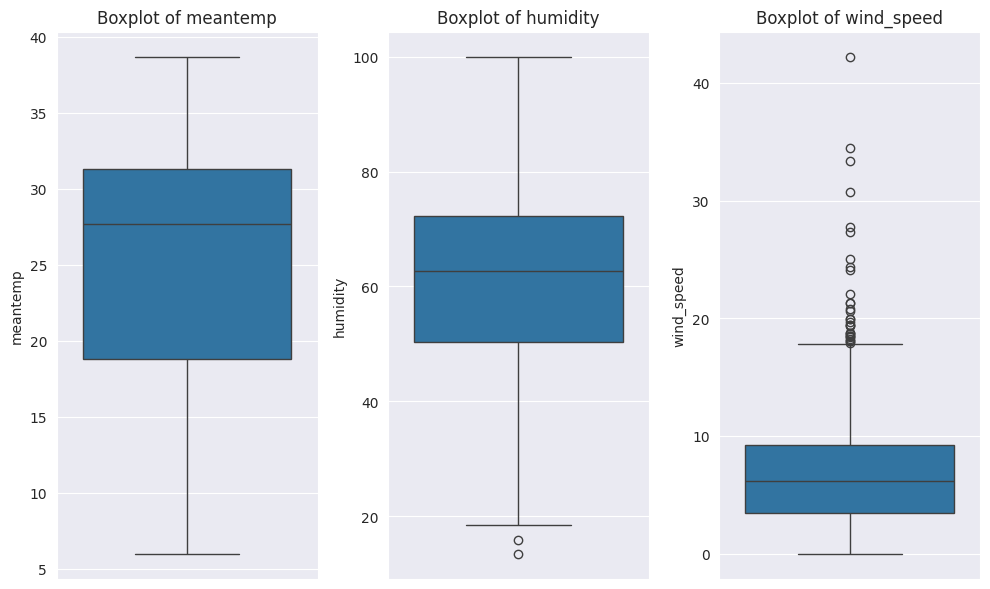

In [12]:
# find out what scaling to perform

f_columns = ['meantemp', 'humidity', 'wind_speed']
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['meantemp'])
plt.title('Boxplot of meantemp')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['humidity'])
plt.title('Boxplot of humidity')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['wind_speed'])
plt.title('Boxplot of wind_speed')

plt.tight_layout()
plt.show()

In [13]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
dl_train, dl_val = df.iloc[:train_size], df.iloc[train_size:]
print(len(dl_train), len(dl_val))

1169 293


In [14]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

robust_scaler = RobustScaler()   # scaler for wind_speed
minmax_scaler = MinMaxScaler()  # scaler for humidity
target_transformer = MinMaxScaler()   # scaler for target (meantemp)

In [15]:
dl_train['wind_speed'] = robust_scaler.fit_transform(dl_train[['wind_speed']])  # robust for wind_speed
dl_train['humidity'] = minmax_scaler.fit_transform(dl_train[['humidity']]) # minmax for humidity
dl_train['meantemp'] = target_transformer.fit_transform(dl_train[['meantemp']]) # target

dl_val['wind_speed'] = robust_scaler.transform(dl_val[['wind_speed']])
dl_val['humidity'] = minmax_scaler.transform(dl_val[['humidity']])
dl_val['meantemp'] = target_transformer.transform(dl_val[['meantemp']])

In [16]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [17]:
# Create sequences
sequence_length = 3  # Example sequence length (adjust based on your data and experimentation)
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_val, y_val = create_dataset(dl_val, dl_val['meantemp'], sequence_length)

In [18]:
X_train[0], y_train[0]

(array([[ 0.12227074,  0.84037162, -1.01781807],
        [ 0.04279476,  0.92905405, -0.49615505],
        [ 0.0356623 ,  0.86993243, -0.20673127]]),
 0.08151382823871903)

In [19]:
from tensorflow.keras.layers import LSTM

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 41701 (162.89 KB)
Trainable params: 41701 (162.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Train the model
history = lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=1, callbacks=[early_stopping])


Epoch 1/30
1166/1166 [==============================] - 8s 5ms/step - loss: 0.0077 - val_loss: 0.0058
Epoch 2/30
1166/1166 [==============================] - 4s 4ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 3/30
1166/1166 [==============================] - 4s 3ms/step - loss: 0.0036 - val_loss: 0.0053
Epoch 4/30
1166/1166 [==============================] - 6s 5ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 5/30
1166/1166 [==============================] - 4s 4ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 6/30
1166/1166 [==============================] - 4s 4ms/step - loss: 0.0033 - val_loss: 0.0047
Epoch 7/30
1166/1166 [==============================] - 5s 4ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 8/30
1166/1166 [==============================] - 4s 4ms/step - loss: 0.0031 - val_loss: 0.0103
Epoch 9/30
1166/1166 [==============================] - 4s 4ms/step - loss: 0.0031 - val_loss: 0.0057
Epoch 10/30
1166/1166 [==============================] - 5s 4ms/step - loss: 0.003

In [21]:
dftest = pd.read_csv('/content/DailyClimateTest.csv',
                     parse_dates=['date'],  # change to date time format
                 index_col="date")
dftest = dftest[['meantemp', 'humidity', 'wind_speed']]
dftest

,meantemp,humidity,wind_speed
date,,,
2017-01-01,15.913,85.870,2.743
2017-01-02,18.500,77.222,2.894
2017-01-03,17.111,81.889,4.017
2017-01-04,18.700,70.050,4.545
2017-01-05,18.389,74.944,3.300
...,...,...,...
2017-04-20,34.500,27.500,5.562
2017-04-21,34.250,39.375,6.963
2017-04-22,32.900,40.900,8.890


In [22]:
dftest['wind_speed'] = robust_scaler.transform(dftest[['wind_speed']])
dftest['humidity'] = minmax_scaler.transform(dftest[['humidity']])
dftest['meantemp'] = target_transformer.transform(dftest[['meantemp']])

In [23]:
X_test, y_test = create_dataset(dftest, dftest['meantemp'], sequence_length)

In [24]:
# Evaluate the model on the test data
lstm_pred = lstm_model.predict(X_test)
lstm_pred = target_transformer.inverse_transform(lstm_pred)
y_test = target_transformer.inverse_transform(y_test.reshape(-1, 1))

# Calculate and print the test error
test_mse = mean_squared_error(y_test, lstm_pred)
print(f"Test MSE: {test_mse}")

4/4 [==============================] - 0s 3ms/step
Test MSE: 3.3265118228442314


RMSE: 1.8238727540166368


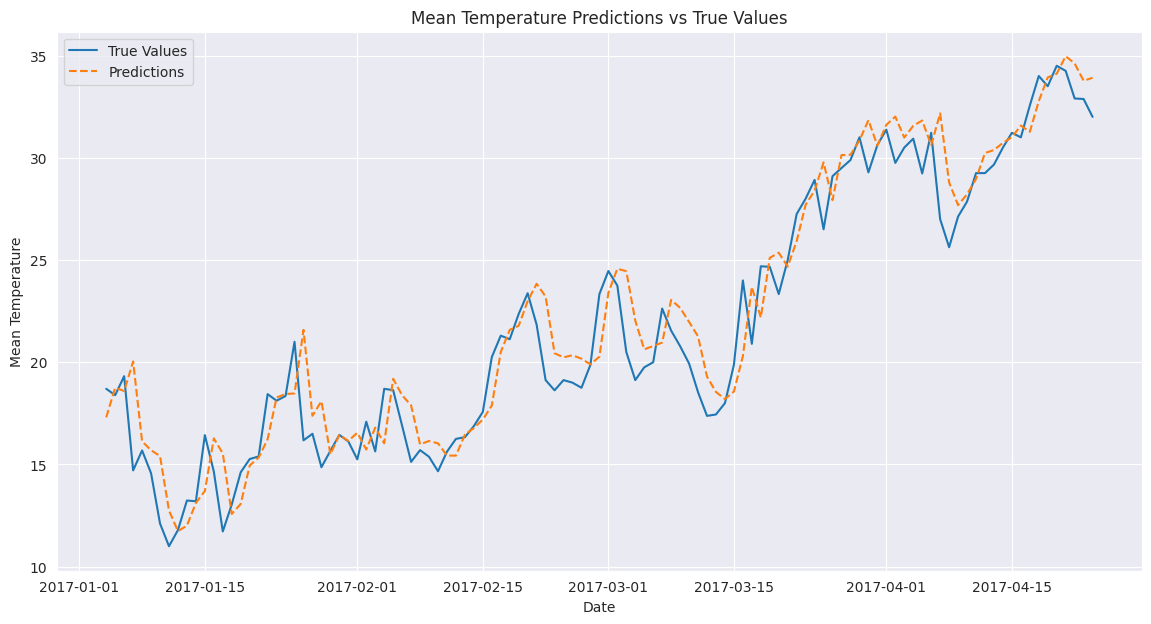

In [26]:
# Calculate RMSE score
rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))

print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(dftest.index[-len(y_test):], y_test, label='True Values')
plt.plot(dftest.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()